In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print(iris_label, iris.target_names)
print(iris.keys())

print(type(iris.feature_names))
print(len(iris.feature_names))
print(type(iris.target_names))
print(len(iris.target_names))
print(type(iris.data))
print(len(iris.data))
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'list'>
4
<class 'numpy.ndarray'>
3
<class 'numpy.ndarray'>
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df["label"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- train_size = 0.8
- test_size = 0.2 => 20%를 테스트 데이터로, 80%를 학습 데이터로 분할
- random_state = 11 => 난수 발생 값을 지정
- shuffle => 데이터를 미리 섞을 것인가 안 섞을 것인가

In [12]:
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris.target,test_size = 0.2, random_state=11)
df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train,y_train) # train 데이터를 넣어서 학습을 수행
pred = df_clf.predict(X_test) # 예측값

from sklearn.metrics import accuracy_score
print("예측정확도  {0:4f}".format(accuracy_score(y_test,pred)))

예측정확도  0.933333


In [14]:
from sklearn.datasets import load_digits

In [15]:
digits=load_digits()

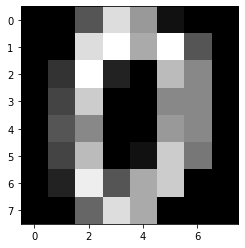

In [21]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0].astype("uint8"), cmap="gray")

## k 폴드 교차 검증(데이터 수가 적을 때 수행하면 됨)
1. 데이터 셋을 train data, test data 로 분리
2. 전체 data set을 나눌 k 정한다.
3. k개의 데이터 폴드로 나누고 train용을 k-1개, test용을 1개로 지정
4. k-1개의 train fold에 대해 학습시키고, 1개의 validation fold에 대해 성능측정
5. 4번 내용을 k번 반복
6. k개의 결과에 대한 평균을 계산  
  
- 장점 : 모든 데이터 셋을 평가에 활용, 평가에 사용되는 데이터 편중을 막을 수 있음. (특정 평가 데이터 셋에 overfit 되는 것을 방지), 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있음
- 모든 데이터 셋을 훈련에 활용 -> 정확도 향상 시킬 수 있음
- 단점 : iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래 걸림

In [31]:
from sklearn.model_selection import KFold
import numpy as np

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5) # 5개로 나누는 어떤 모델을 생성한 것임.
cv_accuracy = []
print(iris.data.shape[0])

150


In [61]:
# kfold 모델의 split을 이용하여 iris.data(1:4)를 분리시킬 index를 array로 반환
# 5개이기 때문에 5개의 train,test zip 제너레이터 형성
for train_index,test_index in kfold.split(iris.data):
    X_train, X_test = iris.data[train_index],iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    #print(train_index)
    #print(test_index)
    print(y_train.shape[0],sum(y_train==1))
    df_clf.fit(X_train,y_train)
    pred=df_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    
    cv_accuracy.append(accuracy)


120 50
120 40
120 20
120 40
120 50


In [58]:
for i in cv_accuracy:
    print("정확도 : {:.2%}".format(i))
print("{:.2%}".format(np.mean(cv_accuracy)))

정확도 : 100.00%
정확도 : 96.67%
정확도 : 86.67%
정확도 : 93.33%
정확도 : 83.33%
92.00%


## Stratified K fold 교차 검증
- 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
    - 특정 레이블 값이 특이하게 많거나 매우 적어서 분포가 한쪽으로 치우치는 경우
    - ex) 대출 사기:1건, 정상대출:999건
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검정 데이트 셋 분배
- 회귀의 결정값은 연속형이기 때문에 결정값이 이산형인 Classification 에서 자주 사용

In [71]:
from sklearn.model_selection import StratifiedKFold
cv_accuracy = []

skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(iris.data,iris.target):
    X_train,X_test = iris.data[train_index], iris.data[test_index]
    y_train,y_test = iris.target[train_index], iris.target[test_index]
    
    a=pd.Series(y_train); b=pd.Series(y_test)
    #print(a.value_counts())
    #print(b.value_counts())
    
    df_clf.fit(X_train,y_train)
    pred=df_clf.predict(X_test)
    
    cv_accuracy.append(accuracy_score(pred,y_test))

In [73]:
for a in cv_accuracy:
    print(a)
print(np.mean(cv_accuracy))

0.98
0.92
0.98
0.96


## cross_val_score
- Regression 은 k fold를,
- Classification은 stratified k fold 교차 검증을 사용
- cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=’2xn_jobs’)
- estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor을 의미
- X : 피처 데이터 세트
- Y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표 기술
- cv : 교차 검증 폴드 수

- 알아서 classification인지 regression인지 판별하여 알아서 k-fold 한번씩 돌리고 정확도를 반환해줌

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

In [76]:
iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state=156)

data=iris_data.data
label = iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(df_clf, data, label, scoring="accuracy", cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.98]
0.9666666666666667


|파라미터|하이퍼파라미터|
|:-|:-|
|매개변수|모델링할 때 사용자가 직접 세팅해주는 값|
|모델 내부에서 결정되는 변수 | 정해진 최적의 값 없음|
|값은 데이터로부터 정해짐 | 경험적인 방법에 의해 결정됨|
|ex)학생들의 키에 대한 평균과 표준편차|ex)knn에서의 k|

## GridSearchCV API
- GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터
- 회귀는 k-fold, 분류는 stratified k-fold
- estimator - classifier, regressor, pipeline이 사용될 수 있음
- param_grid
- key+리스트 값을 가지는 딕셔너리가 주어짐 - estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
- scoring
- 예측 성능을 측정할 평가 방법 지정 - 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예:정확도의 경우 ‘accuracy’)로 지정하나 별도의 성능 평가 지표 함수도 지정 可
- cv - 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정 
- refit - 디폴트가 True이며, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [82]:
# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris= load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,
                        iris_data.target, test_size=0.2,random_state=121)
dtree=DecisionTreeClassifier()
# 파라미터를 딕셔너리 형태로 설정
parameters = {"max_depth":[1,2,3], "min_samples_split":[2,3]}

In [86]:
grid_dtree = GridSearchCV(dtree,param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[["params","mean_test_score","rank_test_score","split0_test_score","split1_test_score","split2_test_score"]]

# params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값
# 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값
# rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냄,1이 가장 좋음


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [89]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.975


In [90]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_
# GridSearchCV의 best_estimator_은 이미 최적학습이 됐으므로 별도 학습 필요X
pred = estimator.predict(X_test)
print(accuracy_score(y_test,pred))

0.9666666666666667
